In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_hdf('../datasets/alexandria_all.h5')
df.head()

mat_id   prototype_id  \
0  agm003188153    A_22_spg194   
1  agm003157159    A_18_spg225   
2  agm003157511    A_11_spg194   
3  agm002194689  ABC2_3_spg225   
4  agm002214707  ABC2_3_spg225   

                                            location  formula      elements  \
0  database/batch-000/Ac/Ac/xxx_02s-00_agm0031881...       Ac          [Ac]   
1  database/batch-000/Ac/Ac/xxx_02s-00_agm0031571...       Ac          [Ac]   
2  database/batch-000/Ac/Ac/xxx_02s-00_agm0031575...       Ac          [Ac]   
3  database/batch-000/Ag/AgAuAc2/xxx_02s-00_agm00...  Ac2AgAu  [Ac, Au, Ag]   
4  database/batch-000/Ge/GeAgAc2/xxx_02s-00_agm00...  Ac2AgGe  [Ac, Ge, Ag]   

   spg  nsites                                             stress  \
0  194       4  [[0.8811667, 0.0, 0.0], [0.0, 0.8811667, 0.0],...   
1  225       1  [[1.2855375, 0.0, 0.0], [0.0, 1.2855375, 0.0],...   
2  194       2  [[1.0878205, 0.0, 0.0], [0.0, 1.0878205, 0.0],...   
3  225       4  [[1.6482437, 0.0, 0.0], [0.0, 1.6482437, 0.0],...   
4  225       4  [[1.6303308, 0.0, 0.0], [0.0, 1.6303308, 0.0],...   

   energy_total  total_mag  band_gap_ind  band_gap_dir    dos_ef  \
0    -18.014796   0.000182           0.0        0.0056  6.191179   
1     -4.491309  -0.000146           0.0        0.0000  1.978073   
2     -8.958979  -0.000517           0.0        0.0001  3.598175   
3    -18.184449  -0.000089           0.0        0.0000  2.548746   
4    -19.047154   0.000005           0.0        0.0000  3.554076   

   energy_corrected  e_above_hull    e_form  e_phase_separation decomposition  
0        -18.014795      0.000000  0.000000            0.000000           Ac   
1         -4.491309      0.012390  0.012390            0.012390           Ac   
2         -8.958980      0.024209  0.024209            0.024209           Ac   
3        -18.184448      0.001369 -0.485460            0.001369   AcAg  AcAu   
4        -19.047153      0.000000 -0.447397           -0.057872      Ac2AgGe

Data Types:
 mat_id                 object
prototype_id           object
location               object
formula                object
elements               object
spg                     int64
nsites                  int64
stress                 object
energy_total          float64
total_mag             float64
band_gap_ind          float64
band_gap_dir          float64
dos_ef                float64
energy_corrected      float64
e_above_hull          float64
e_form                float64
e_phase_separation    float64
decomposition          object
dtype: object

Missing Values:
 mat_id                0
prototype_id          0
location              0
formula               0
elements              0
spg                   0
nsites                0
stress                0
energy_total          0
total_mag             0
band_gap_ind          0
band_gap_dir          0
dos_ef                0
energy_corrected      0
e_above_hull          0
e_form                0
e_phase_separation    0
decompo

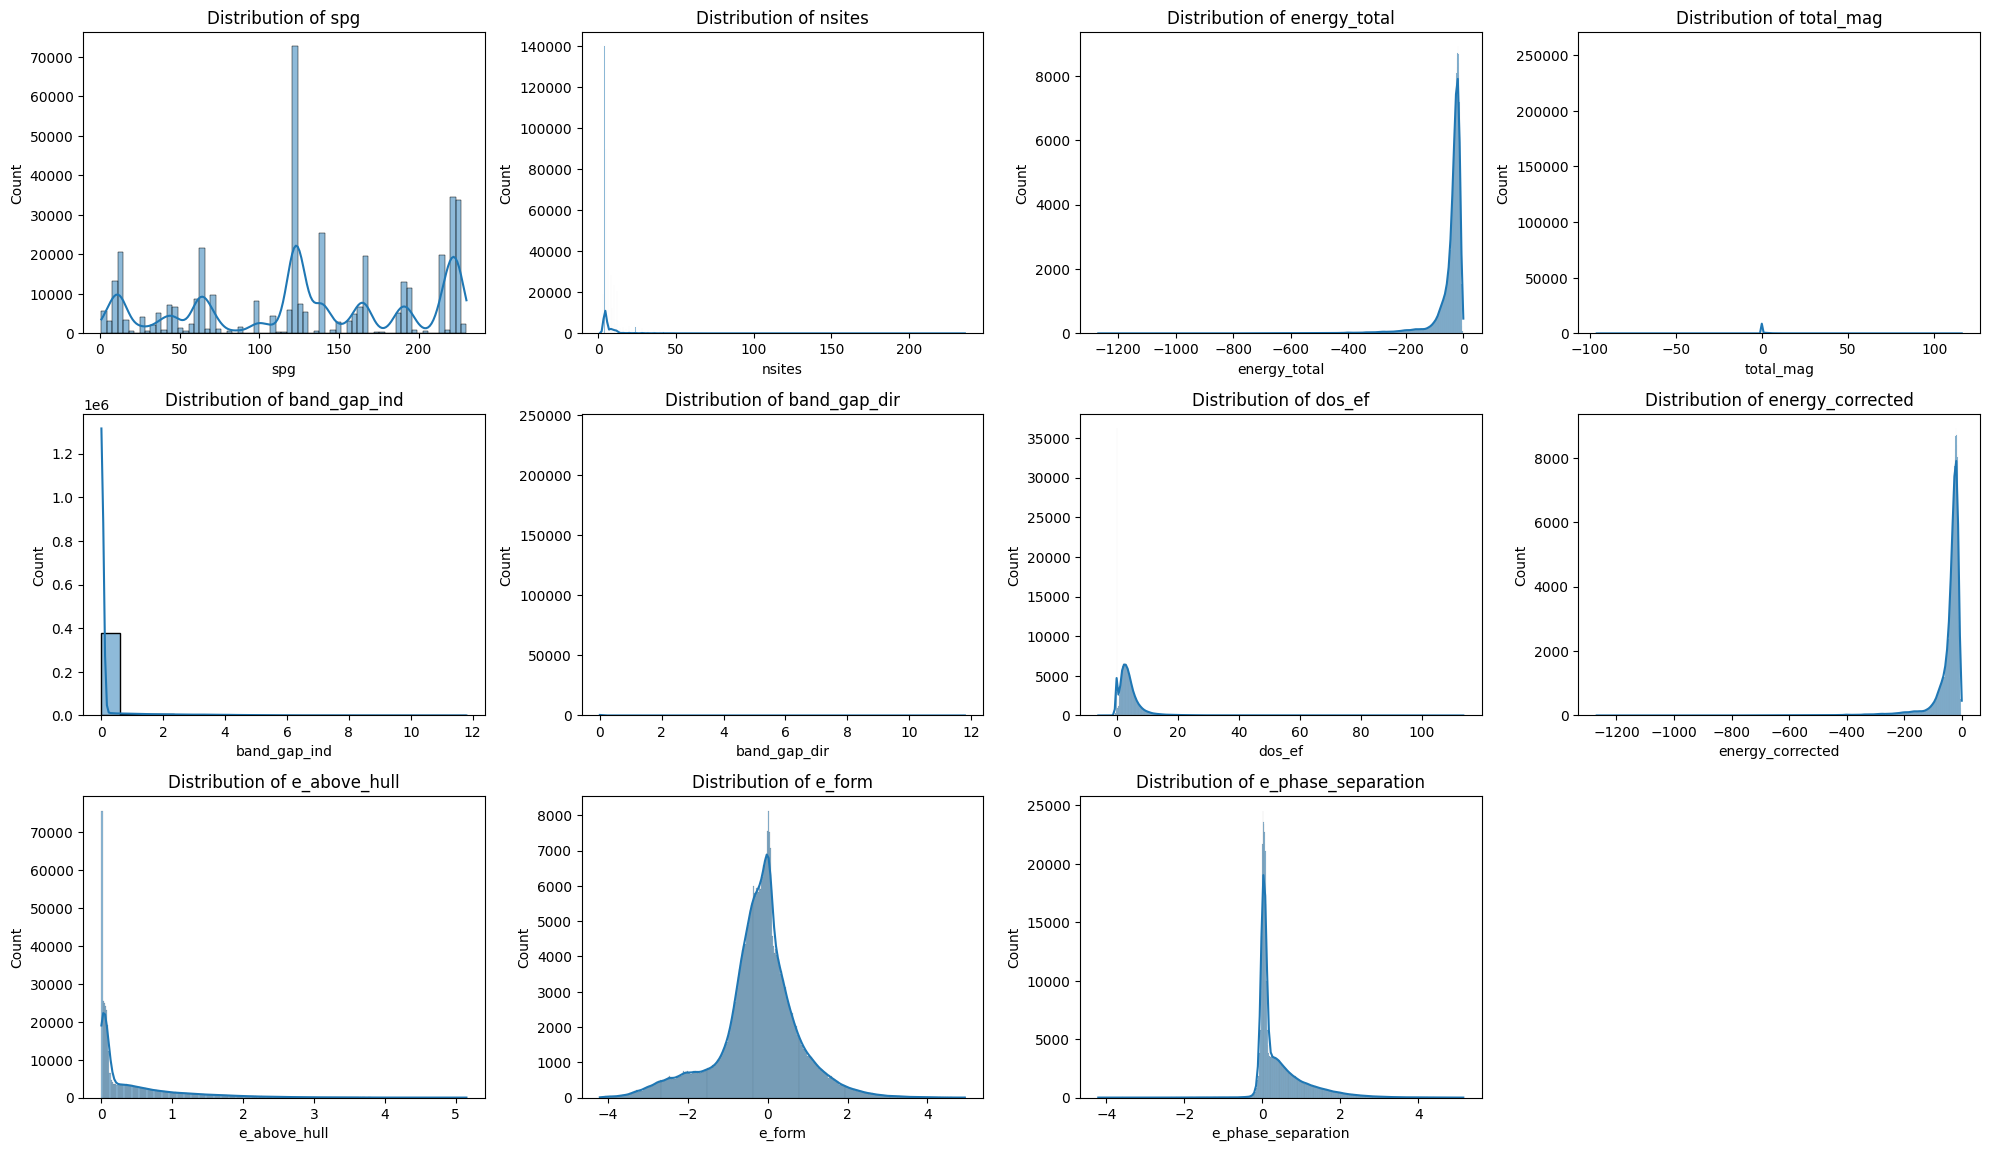

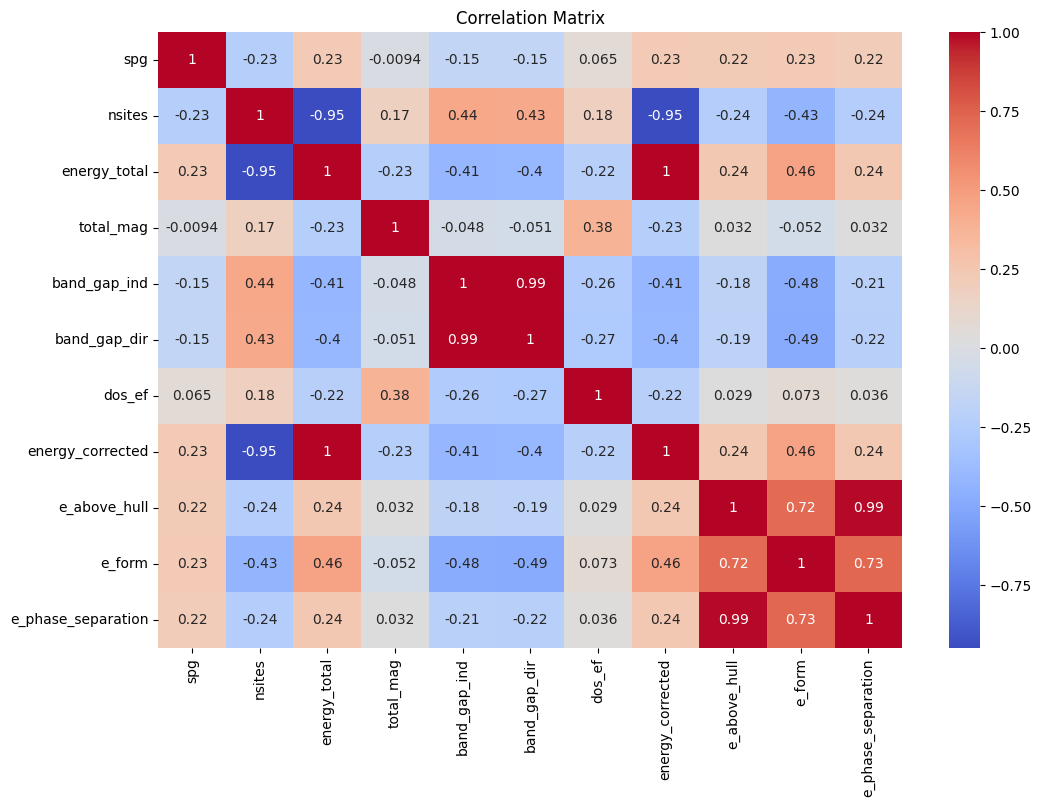

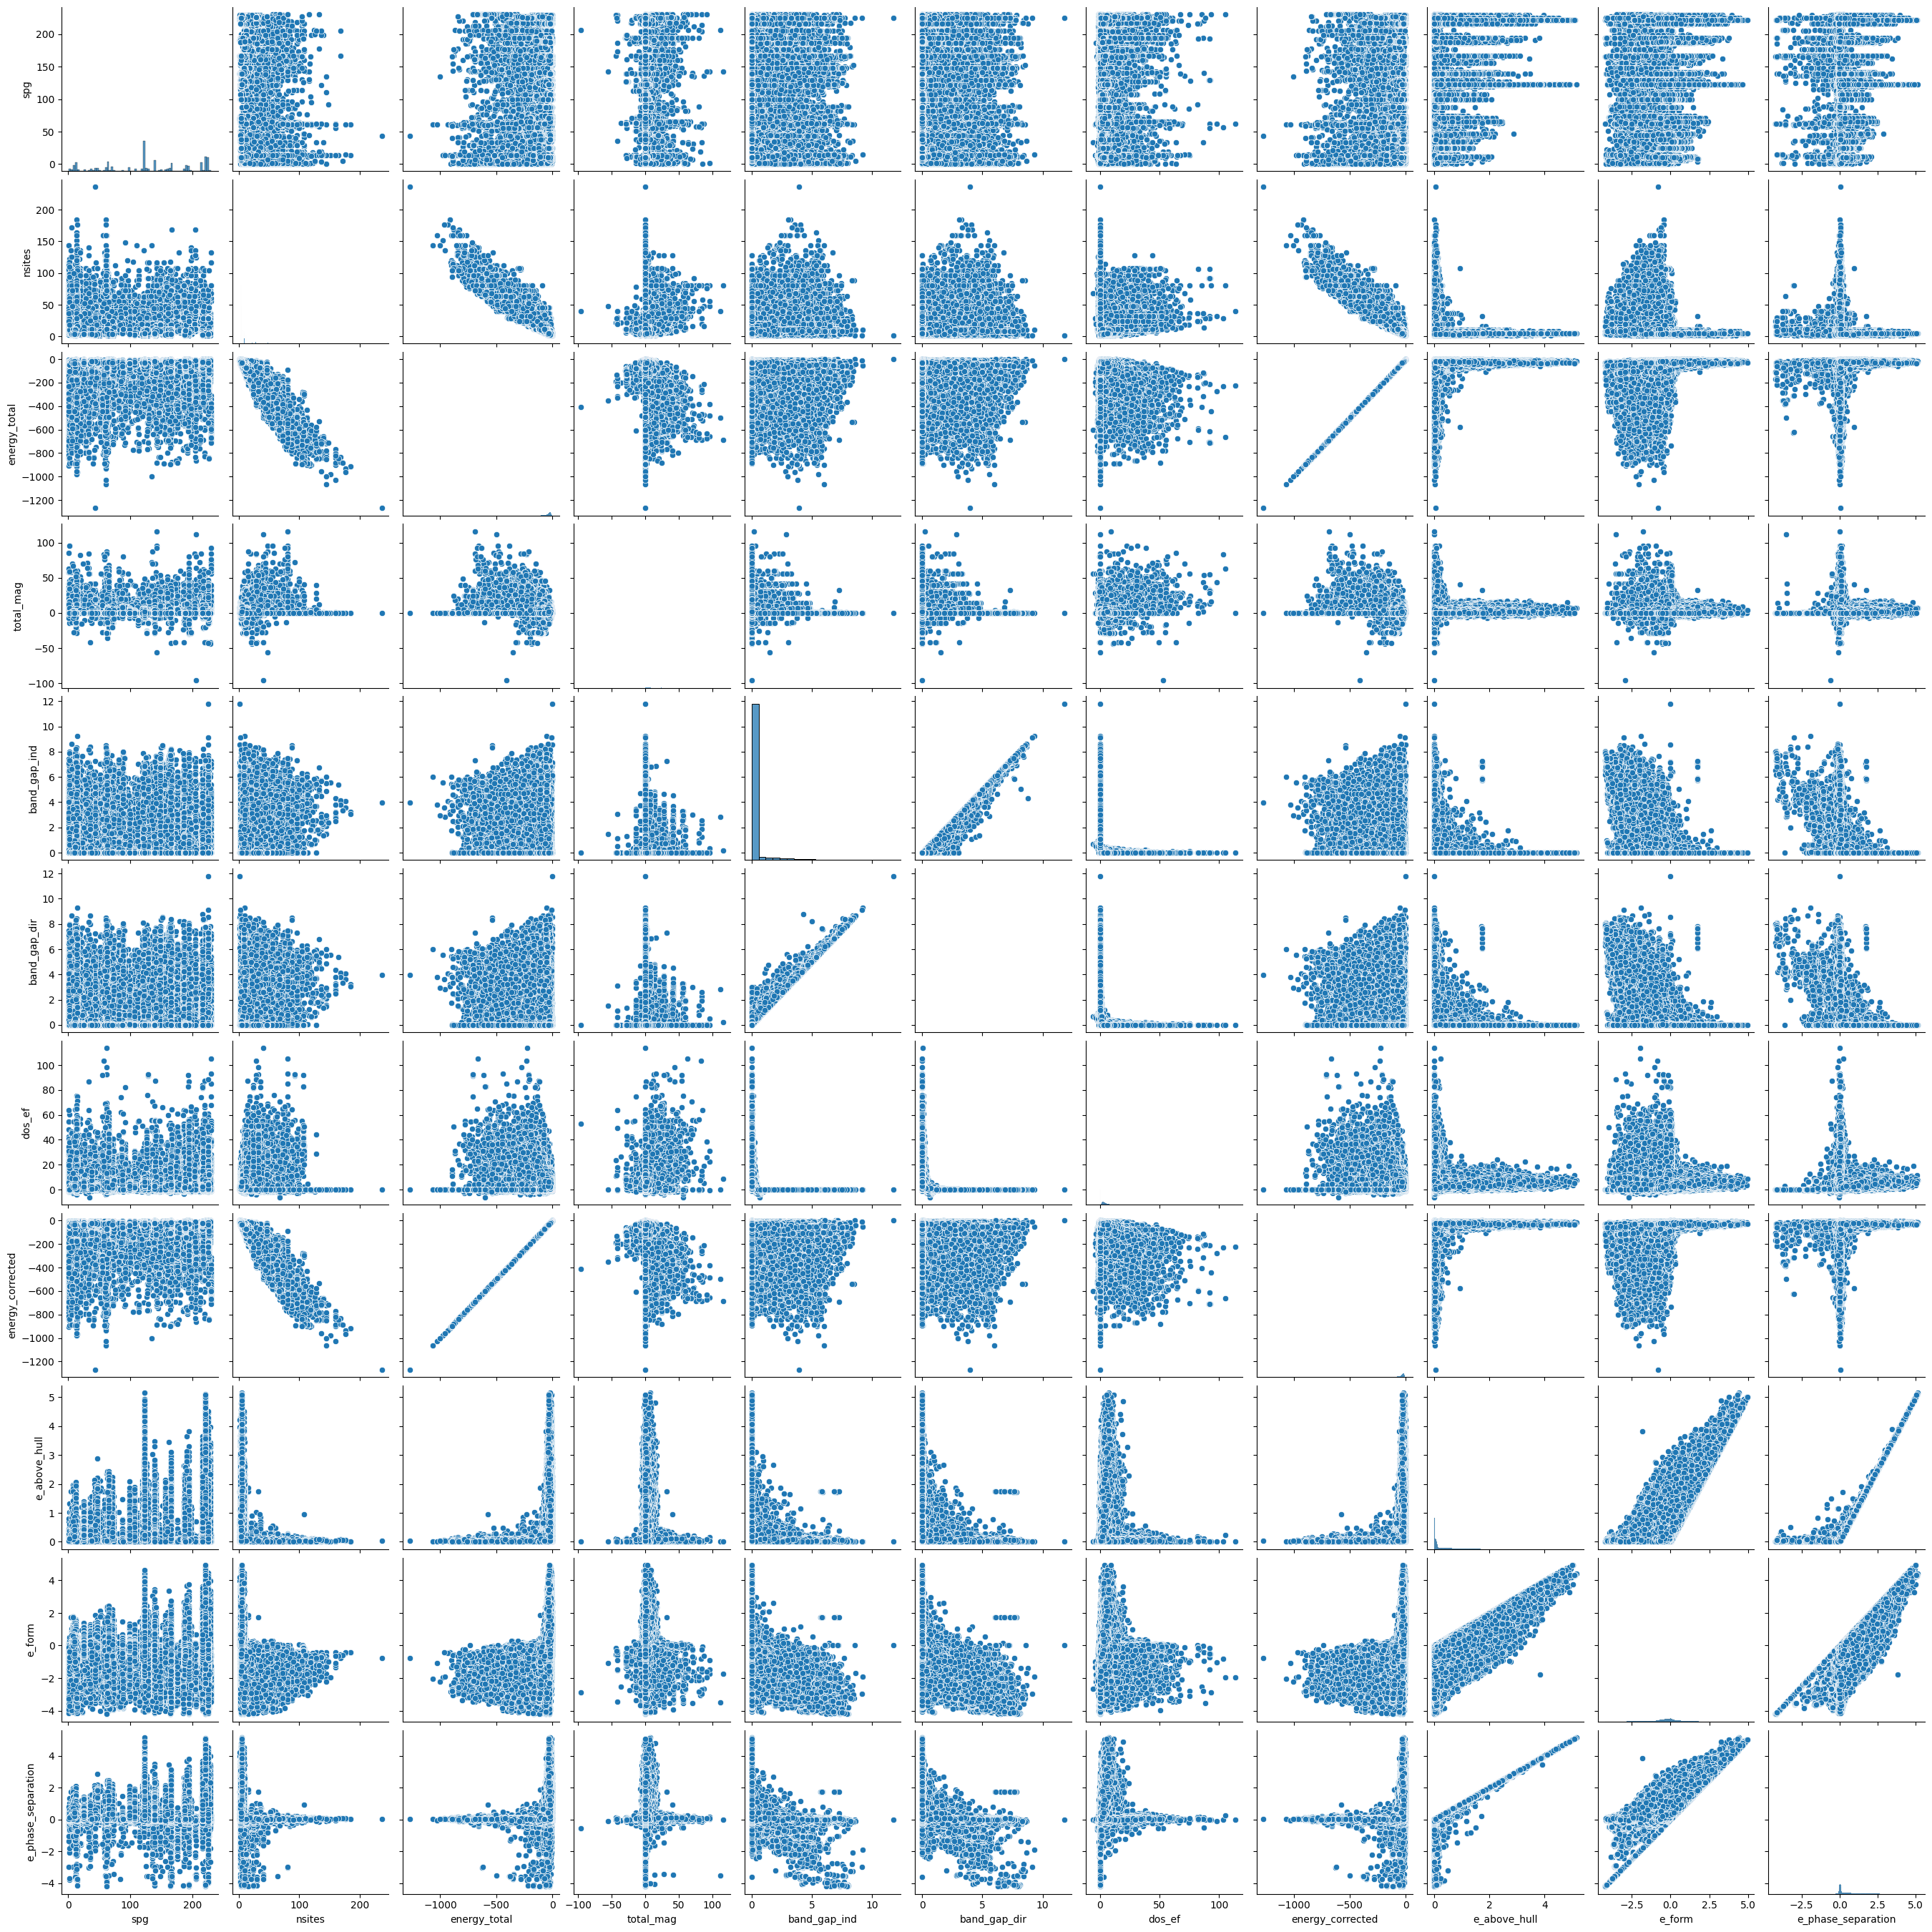

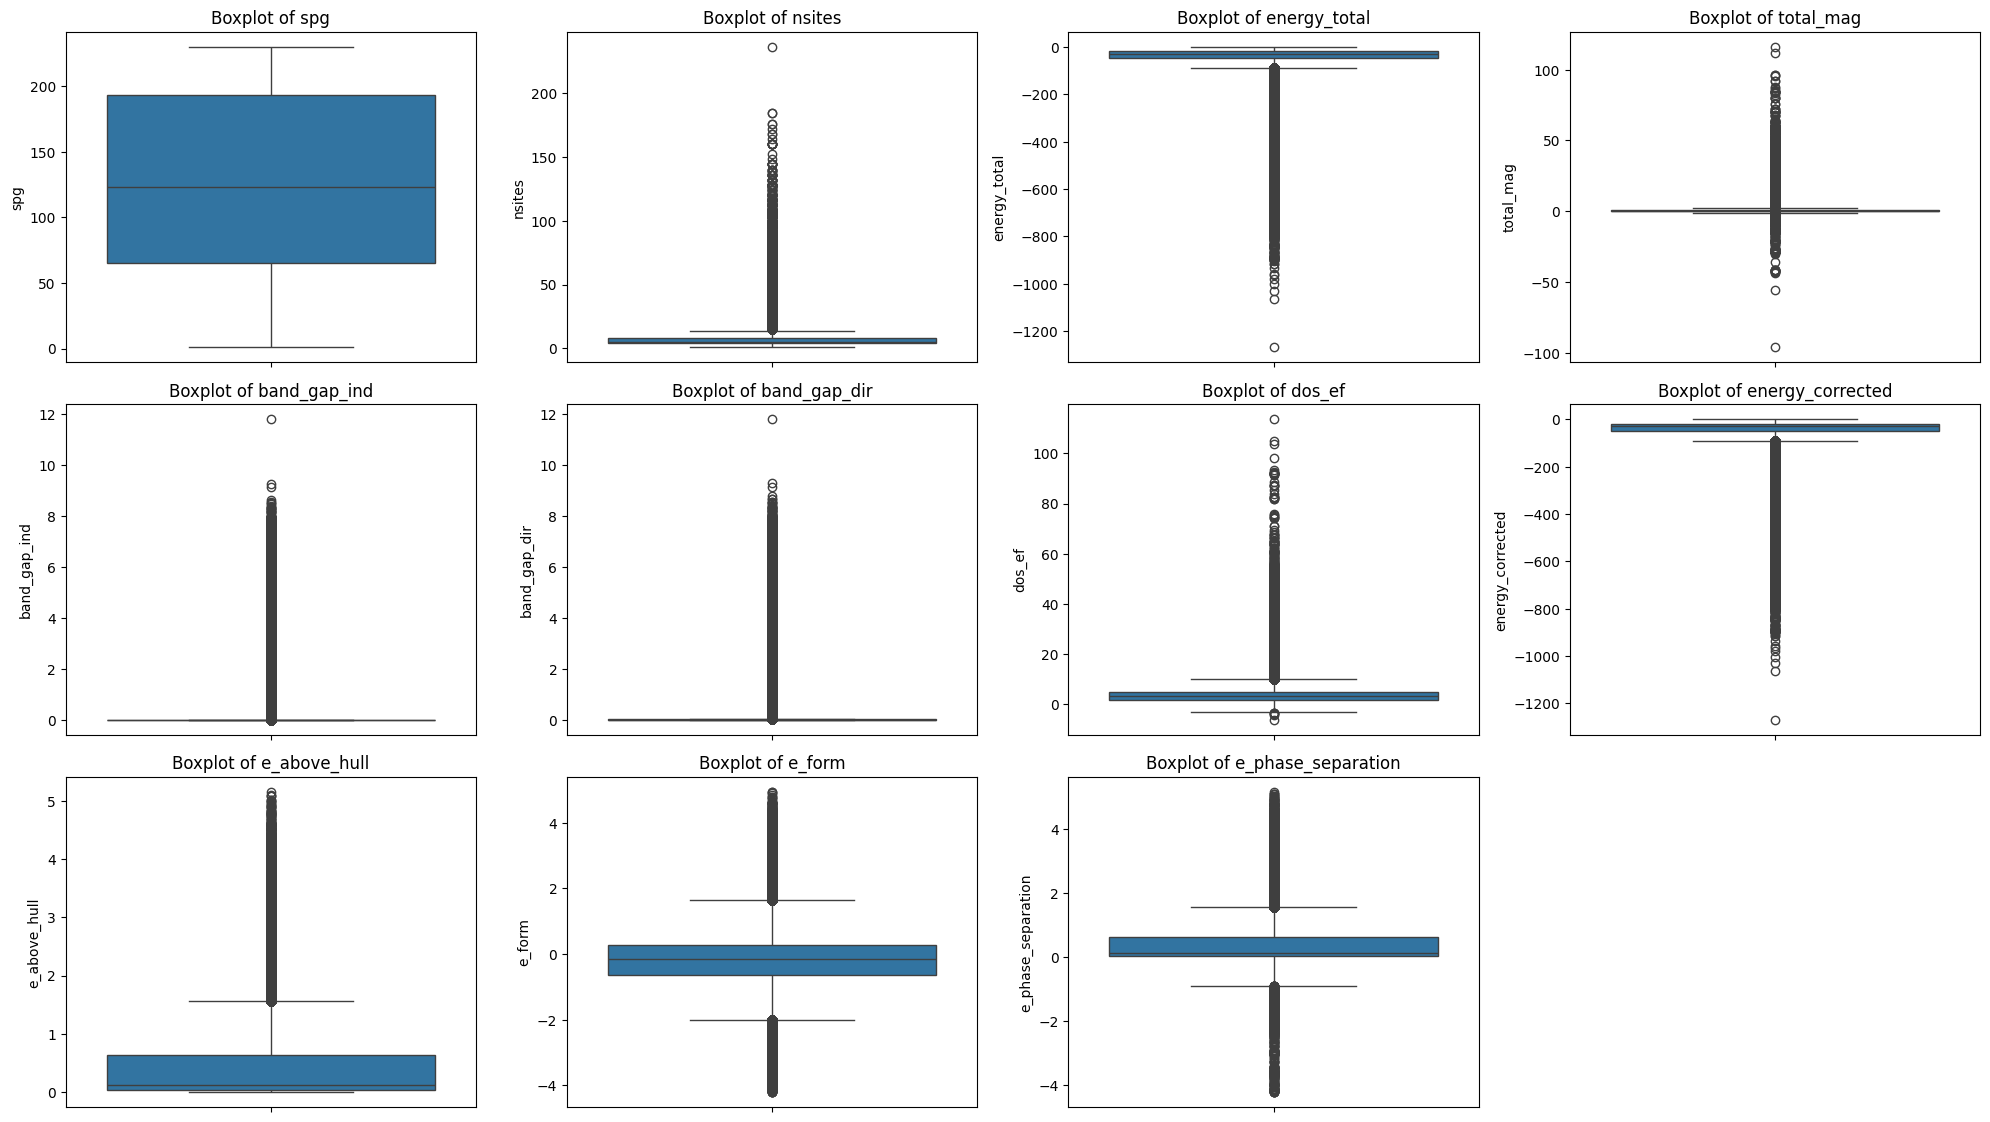

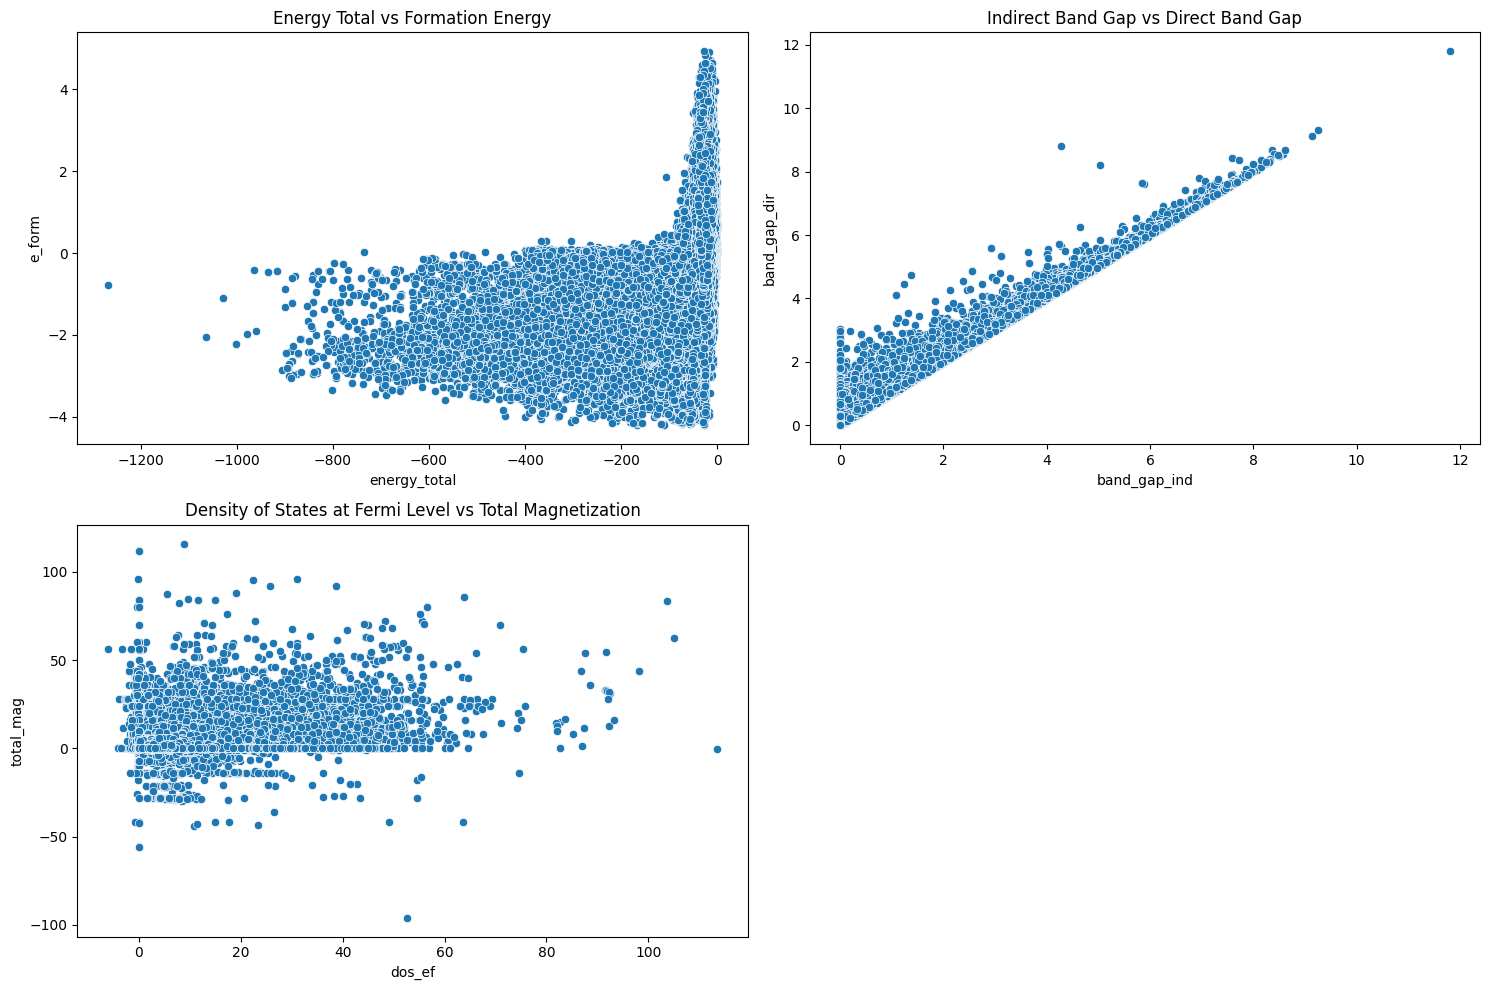

In [13]:
# Display basic information
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

# Visualize distributions
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Correlation matrix
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for numerical columns
sns.pairplot(df[numeric_columns])
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Scatter plots for selected pairs
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['energy_total'], y=df['e_form'])
plt.title('Energy Total vs Formation Energy')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['band_gap_ind'], y=df['band_gap_dir'])
plt.title('Indirect Band Gap vs Direct Band Gap')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['dos_ef'], y=df['total_mag'])
plt.title('Density of States at Fermi Level vs Total Magnetization')

plt.tight_layout()
plt.show()

In [16]:
df[df["energy_total"] == df["energy_total"].min()]

mat_id          prototype_id  \
307385  agm003280695  A2B3C6D12E36_1_spg43   

                                                 location          formula  \
307385  database/batch-002/H/H36C12O3Si6As2/xxx_02s-00...  Si6As2H36(C4O)3   

                 elements  spg  nsites  \
307385  [Si, As, H, C, O]   43     236   

                                                   stress  energy_total  \
307385  [[0.27332613, 0.0, 0.0], [0.0, 0.24357761, -0....  -1268.426348   

        total_mag  band_gap_ind  band_gap_dir  dos_ef  energy_corrected  \
307385  -0.000445        3.9594        3.9594     0.0        -1268.4264   

        e_above_hull    e_form  e_phase_separation  \
307385      0.040441 -0.778293            0.040441   

                        decomposition  
307385   SiAs2  SiAs  SiC  H4C  SiO2

In [25]:
df[(df["band_gap_dir"] != 0.0) & (df["band_gap_ind"] != 0.0)]

mat_id      prototype_id  \
69      agm002152635     ABC2_3_spg225   
113     agm003194129     A2B3_1_spg164   
128     agm002185316     A2B3_28_spg15   
137     agm002188012     ABC2_3_spg225   
150     agm002244483     A2B3_28_spg15   
...              ...               ...   
415324  agm003187056  ABC2_5874_spg156   
415325  agm002223317    ABC2_56_spg141   
415326  agm002861862     ABC2_7_spg122   
415327  agm002773565    ABC2_71_spg166   
415328  agm003222182     AB4C4_22_spg2   

                                                 location   formula  \
69      database/batch-000/Ge/GePtAc2/xxx_02s-00_agm00...   Ac2GePt   
113     database/batch-000/O/O3Ac2/xxx_02s-00_agm00319...     Ac2O3   
128     database/batch-000/Se/Se3Ac2/xxx_02s-00_agm002...    Ac2Se3   
137     database/batch-000/Si/SiPtAc2/xxx_02s-00_agm00...   Ac2SiPt   
150     database/batch-000/Te/Te3Ac2/xxx_02s-00_agm002...    Ac2Te3   
...                                                   ...       ...   
415324  database/batch-000/N/N2ZnZr/xxx_02s-00_agm0031...    ZrZnN2   
415325  database/batch-000/N/N2ZnZr/xxx_02s-00_agm0022...    ZrZnN2   
415326  database/batch-000/N/N2ZnZr/xxx_02s-00_agm0028...    ZrZnN2   
415327  database/batch-000/N/N2ZnZr/xxx_02s-00_agm0027...    ZrZnN2   
415328  database/batch-001/N/N4Zn4Zr/xxx_02s-00_agm003...  Zr(ZnN)4   

            elements  spg  nsites  \
69      [Ac, Ge, Pt]  225       4   
113          [Ac, O]  164       5   
128         [Ac, Se]  167      10   
137     [Ac, Si, Pt]  225       4   
150         [Ac, Te]  167      10   
...              ...  ...     ...   
415324   [Zn, Zr, N]  156       4   
415325   [Zn, Zr, N]  141       8   
415326   [Zn, Zr, N]  122       8   
415327   [Zn, Zr, N]  166       4   
415328   [Zr, Zn, N]    2      18   

                                                   stress  energy_total  \
69      [[0.8169862, 0.0, 0.0], [0.0, 0.8169862, 0.0],...    -23.962233   
113     [[0.5946197, 0.0, 0.0], [0.0, 0.5946197, 0.0],...    -41.496775   
128     [[0.38028905, 0.0, 0.0], [0.0, 0.38028905, 0.0...    -60.290205   
137     [[1.2609308, 0.0, 0.0], [0.0, 1.2609308, 0.0],...    -24.351057   
150     [[0.46580532, 0.0, 0.0], [0.0, 0.46580532, 0.0...    -53.614751   
...                                                   ...           ...   
415324  [[0.42113012, 0.0, 0.0], [0.0, 0.42113012, 0.0...    -31.940109   
415325  [[0.06390074, 0.0, 0.0], [0.0, 0.06390074, 0.0...    -63.279983   
415326  [[0.07456803, 0.0, 0.0], [0.0, 0.07456803, 0.0...    -62.965901   
415327  [[0.07704853, 0.0, 0.0], [0.0, 0.07704853, 0.0...    -31.457476   
415328  [[0.20456827, 0.06837835, 0.03300319], [0.0683...   -105.659931   

        total_mag  band_gap_ind  band_gap_dir    dos_ef  energy_corrected  \
69       0.000105        0.0331        0.2025  0.685872        -23.962233   
113      0.000018        3.5410        3.8436  0.000000        -41.496777   
128      0.000082        2.6159        2.6840  0.000000        -60.290203   
137      0.000039        0.0534        0.1582  0.696784        -24.351057   
150     -0.000937        1.9574        2.0765  0.000000        -53.614750   
...           ...           ...           ...       ...               ...   
415324  -0.000016        2.0716        2.6643  0.000000        -31.940110   
415325  -0.000021        0.7355        1.3467 -0.017962        -63.279984   
415326  -0.000094        1.8599        2.3283  0.000000        -62.965900   
415327  -0.000012        1.1056        1.8036 -0.000200        -31.457476   
415328  -0.000102        1.0818        1.1939 -0.002611       -105.659930   

        e_above_hull    e_form  e_phase_separation     decomposition  
69          0.000000 -0.763076           -0.024897          Ac2GePt   
113         0.000000 -3.348287           -3.348287            Ac2O3   
128         0.000000 -1.917408           -1.917408           Ac2Se3   
137         0.000000 -0.658356           -0.024733          Ac2SiPt   
150         0.000000 -1.444334